In [197]:
import pandas as pd
import numpy as np
import nltk
import json

In [198]:
weights = {'keywords': 20, 'overview': 5, 'genres':20, 'language':20, }

In [199]:
origin_db = pd.read_csv('tmdb_5000_movies.csv')
origin_db.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [200]:
origin_db.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [201]:
selected_features = ['title', 'genres', 'keywords', 'spoken_languages', 'overview',
    'production_companies', 'release_date', 'runtime', 'vote_average']
db = origin_db[selected_features].copy()
db

,title,genres,keywords,spoken_languages,overview,production_companies,release_date,runtime,vote_average
0,Avatar,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...","In the 22nd century, a paraplegic Marine is di...","[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,162.0,7.2
1,Pirates of the Caribbean: At World's End,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","Captain Barbossa, long believed to be dead, ha...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,169.0,6.9
2,Spectre,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",A cryptic message from Bond’s past sends him o...,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",2015-10-26,148.0,6.3
3,The Dark Knight Rises,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""iso_639_1"": ""en"", ""name"": ""English""}]",Following the death of District Attorney Harve...,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",2012-07-16,165.0,7.6
4,John Carter,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","John Carter is a war-weary, former military ca...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",2012-03-07,132.0,6.1
...,...,...,...,...,...,...,...,...,...
4798,El Mariachi,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 5616, ""name"": ""united states\u2013mexi...","[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",El Mariachi just wants to play his guitar and ...,"[{""name"": ""Columbia Pictures"", ""id"": 5}]",1992-09-04,81.0,6.6
4799,Newlyweds,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",[],[],A newlywed couple's honeymoon is upended by th...,[],2011-12-26,85.0,5.9
4800,"Signed, Sealed, Delivered","[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...","[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","""Signed, Sealed, Delivered"" introduces a dedic...","[{""name"": ""Front Street Pictures"", ""id"": 3958}...",2013-10-13,120.0,7.0
4801,Shanghai Calling,[],[],"[{""iso_639_1"": ""en"", ""name"": ""English""}]",When ambitious New York attorney Sam is sent t...,[],2012-05-03,98.0,5.7


In [202]:
print(db.shape)
db.dropna(inplace=True)
print(db.shape)

(4803, 9)
(4799, 9)


In [203]:
db.sample()

,title,genres,keywords,spoken_languages,overview,production_companies,release_date,runtime,vote_average
3823,Midnight Cowboy,"[{""id"": 18, ""name"": ""Drama""}]","[{""id"": 1879, ""name"": ""shower""}]","[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",A naive male prostitute and his sickly friend ...,"[{""name"": ""United Artists"", ""id"": 60}, {""name""...",1969-05-25,113.0,7.4


In [204]:
##############################################
#This cell merge overview from another dataset
##############################################
edb = pd.read_csv('wiki_movie_plots_deduped_with_summaries.csv')
db.title = db.title.apply(lambda x: x.strip().lower())
edb.Title = edb.Title.apply(lambda x: x.strip().lower())
def append_plot(row):
    try:
        first_row = edb[edb.Title == row['title']].iloc[0]
    except:
        return row.overview
    row['overview'] = (row['overview'] * weights['overview']  + first_row['Plot'])
    return row['overview']
overview_result = db.apply(append_plot, axis=1)
overview_result

0       In the 22nd century, a paraplegic Marine is di...
1       Captain Barbossa, long believed to be dead, ha...
2       A cryptic message from Bond’s past sends him o...
3       Following the death of District Attorney Harve...
4       John Carter is a war-weary, former military ca...
                              ...                        
4798    El Mariachi just wants to play his guitar and ...
4799    A newlywed couple's honeymoon is upended by th...
4800    "Signed, Sealed, Delivered" introduces a dedic...
4801    When ambitious New York attorney Sam is sent t...
4802    Ever since the second grade when he first saw ...
Length: 4799, dtype: object

In [205]:
overviews = overview_result
overviews = overviews.map(lambda x: x.lower())
overviews

0       in the 22nd century, a paraplegic marine is di...
1       captain barbossa, long believed to be dead, ha...
2       a cryptic message from bond’s past sends him o...
3       following the death of district attorney harve...
4       john carter is a war-weary, former military ca...
                              ...                        
4798    el mariachi just wants to play his guitar and ...
4799    a newlywed couple's honeymoon is upended by th...
4800    "signed, sealed, delivered" introduces a dedic...
4801    when ambitious new york attorney sam is sent t...
4802    ever since the second grade when he first saw ...
Length: 4799, dtype: object

In [206]:
import string
pure_words = overviews.map(lambda text: ''.join([c for c in text if c not in string.punctuation]))
pure_words

0       in the 22nd century a paraplegic marine is dis...
1       captain barbossa long believed to be dead has ...
2       a cryptic message from bond’s past sends him o...
3       following the death of district attorney harve...
4       john carter is a warweary former military capt...
                              ...                        
4798    el mariachi just wants to play his guitar and ...
4799    a newlywed couples honeymoon is upended by the...
4800    signed sealed delivered introduces a dedicated...
4801    when ambitious new york attorney sam is sent t...
4802    ever since the second grade when he first saw ...
Length: 4799, dtype: object

In [207]:
tokenized_words = pure_words.map(lambda text: nltk.word_tokenize(text))
tokenized_words

0       [in, the, 22nd, century, a, paraplegic, marine...
1       [captain, barbossa, long, believed, to, be, de...
2       [a, cryptic, message, from, bond, ’, s, past, ...
3       [following, the, death, of, district, attorney...
4       [john, carter, is, a, warweary, former, milita...
                              ...                        
4798    [el, mariachi, just, wants, to, play, his, gui...
4799    [a, newlywed, couples, honeymoon, is, upended,...
4800    [signed, sealed, delivered, introduces, a, ded...
4801    [when, ambitious, new, york, attorney, sam, is...
4802    [ever, since, the, second, grade, when, he, fi...
Length: 4799, dtype: object

In [208]:
from nltk.corpus import stopwords
stopword_set = stopwords.words('english')
stopword_wipped = tokenized_words.map(lambda text_list: [word for word in text_list if word not in stopword_set])
stopword_wipped

0       [22nd, century, paraplegic, marine, dispatched...
1       [captain, barbossa, long, believed, dead, come...
2       [cryptic, message, bond, ’, past, sends, trail...
3       [following, death, district, attorney, harvey,...
4       [john, carter, warweary, former, military, cap...
                              ...                        
4798    [el, mariachi, wants, play, guitar, carry, fam...
4799    [newlywed, couples, honeymoon, upended, arriva...
4800    [signed, sealed, delivered, introduces, dedica...
4801    [ambitious, new, york, attorney, sam, sent, sh...
4802    [ever, since, second, grade, first, saw, et, e...
Length: 4799, dtype: object

In [209]:
from nltk.stem.porter import PorterStemmer
stemmed_words = stopword_wipped.map(lambda word_list: ' '.join([PorterStemmer().stem(word) for word in word_list]))
stemmed_words

0       22nd centuri parapleg marin dispatch moon pand...
1       captain barbossa long believ dead come back li...
2       cryptic messag bond ’ past send trail uncov si...
3       follow death district attorney harvey dent bat...
4       john carter warweari former militari captain w...
                              ...                        
4798    el mariachi want play guitar carri famili trad...
4799    newlyw coupl honeymoon upend arriv respect sister
4800    sign seal deliv introduc dedic quartet civil s...
4801    ambiti new york attorney sam sent shanghai ass...
4802    ever sinc second grade first saw et extraterre...
Length: 4799, dtype: object

In [210]:
db['processed_overview'] = stemmed_words
db['processed_overview']


0       22nd centuri parapleg marin dispatch moon pand...
1       captain barbossa long believ dead come back li...
2       cryptic messag bond ’ past send trail uncov si...
3       follow death district attorney harvey dent bat...
4       john carter warweari former militari captain w...
                              ...                        
4798    el mariachi want play guitar carri famili trad...
4799    newlyw coupl honeymoon upend arriv respect sister
4800    sign seal deliv introduc dedic quartet civil s...
4801    ambiti new york attorney sam sent shanghai ass...
4802    ever sinc second grade first saw et extraterre...
Name: processed_overview, Length: 4799, dtype: object

In [211]:
pure_keywords = db['keywords'].map(lambda json_text: ' '.join([PorterStemmer().stem(item['name']) for item in json.loads(json_text)]))
pure_keywords *= weights['keywords']
pure_keywords

0       culture clash futur space war space coloni soc...
1       ocean drug abus exotic island east india tradi...
2       spi based on novel secret ag sequel mi6 britis...
3       dc comic crime fight terrorist secret ident bu...
4       based on novel mar medallion space travel prin...
                              ...                        
4798    united states–mexico barri leg arm paper knif ...
4799                                                     
4800    date love at first sight narrat investig team ...
4801                                                     
4802    obsess camcord crush dream girlobsess camcord ...
Name: keywords, Length: 4799, dtype: object

In [212]:
revenue_categories = origin_db['revenue'].map(lambda x: 'HIGH-REVENUE' if x >= 1* 10**9 else 'MEDIUM-REVENUE' if x >= 0.5 * 10**9 else 'LOW-REVENUE')
db['revenue_categories'] = revenue_categories
db['revenue_categories']

0         HIGH-REVENUE
1       MEDIUM-REVENUE
2       MEDIUM-REVENUE
3         HIGH-REVENUE
4          LOW-REVENUE
             ...      
4798       LOW-REVENUE
4799       LOW-REVENUE
4800       LOW-REVENUE
4801       LOW-REVENUE
4802       LOW-REVENUE
Name: revenue_categories, Length: 4799, dtype: object

In [213]:
compaies = db['production_companies']
compaies

0       [{"name": "Ingenious Film Partners", "id": 289...
1       [{"name": "Walt Disney Pictures", "id": 2}, {"...
2       [{"name": "Columbia Pictures", "id": 5}, {"nam...
3       [{"name": "Legendary Pictures", "id": 923}, {"...
4             [{"name": "Walt Disney Pictures", "id": 2}]
                              ...                        
4798             [{"name": "Columbia Pictures", "id": 5}]
4799                                                   []
4800    [{"name": "Front Street Pictures", "id": 3958}...
4801                                                   []
4802    [{"name": "rusty bear entertainment", "id": 87...
Name: production_companies, Length: 4799, dtype: object

In [214]:
compaies_processed = compaies.map(lambda row: ' '.join(
    [item['name'] for item in json.loads(row)]))
db['compaies_processed'] = compaies_processed
db['compaies_processed']

0       Ingenious Film Partners Twentieth Century Fox ...
1       Walt Disney Pictures Jerry Bruckheimer Films S...
2                            Columbia Pictures Danjaq B24
3       Legendary Pictures Warner Bros. DC Entertainme...
4                                    Walt Disney Pictures
                              ...                        
4798                                    Columbia Pictures
4799                                                     
4800    Front Street Pictures Muse Entertainment Enter...
4801                                                     
4802            rusty bear entertainment lucky crow films
Name: compaies_processed, Length: 4799, dtype: object

In [215]:
languages = db['spoken_languages']
languages

0       [{"iso_639_1": "en", "name": "English"}, {"iso...
1                [{"iso_639_1": "en", "name": "English"}]
2       [{"iso_639_1": "fr", "name": "Fran\u00e7ais"},...
3                [{"iso_639_1": "en", "name": "English"}]
4                [{"iso_639_1": "en", "name": "English"}]
                              ...                        
4798        [{"iso_639_1": "es", "name": "Espa\u00f1ol"}]
4799                                                   []
4800             [{"iso_639_1": "en", "name": "English"}]
4801             [{"iso_639_1": "en", "name": "English"}]
4802             [{"iso_639_1": "en", "name": "English"}]
Name: spoken_languages, Length: 4799, dtype: object

In [216]:
languages_processed = languages.map(lambda row: ' '.join(
    [(item['iso_639_1'] + ' ') * weights['language'] for item in json.loads(row)]))
db['languages_processed'] = languages_processed
db['languages_processed']


0       enenenenenenenenenenenenenenenenenenenen esese...
1                enenenenenenenenenenenenenenenenenenenen
2       frfrfrfrfrfrfrfrfrfrfrfrfrfrfrfrfrfrfrfr enene...
3                enenenenenenenenenenenenenenenenenenenen
4                enenenenenenenenenenenenenenenenenenenen
                              ...                        
4798             eseseseseseseseseseseseseseseseseseseses
4799                                                     
4800             enenenenenenenenenenenenenenenenenenenen
4801             enenenenenenenenenenenenenenenenenenenen
4802             enenenenenenenenenenenenenenenenenenenen
Name: languages_processed, Length: 4799, dtype: object

In [217]:
db.columns

Index(['title', 'genres', 'keywords', 'spoken_languages', 'overview',
       'production_companies', 'release_date', 'runtime', 'vote_average',
       'processed_overview', 'revenue_categories', 'compaies_processed',
       'languages_processed'],
      dtype='object')

<AxesSubplot:ylabel='Frequency'>

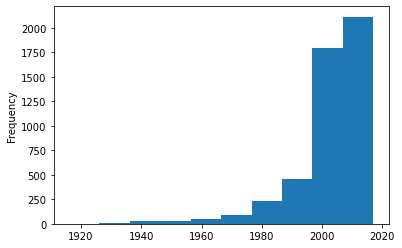

In [218]:
years = pd.to_datetime(db['release_date']).dt.year
years.plot(kind='hist')

In [219]:
years_processed = years.apply(lambda year: (year // 10 * 10) if year >= 1980 else 1960)
db['years_processed'] = years_processed
db['years_processed']

0       2000
1       2000
2       2010
3       2010
4       2010
        ... 
4798    1990
4799    2010
4800    2010
4801    2010
4802    2000
Name: years_processed, Length: 4799, dtype: int64

In [220]:
db.columns

Index(['title', 'genres', 'keywords', 'spoken_languages', 'overview',
       'production_companies', 'release_date', 'runtime', 'vote_average',
       'processed_overview', 'revenue_categories', 'compaies_processed',
       'languages_processed', 'years_processed'],
      dtype='object')

<AxesSubplot:ylabel='Frequency'>

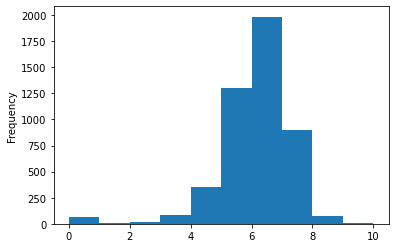

In [221]:
db.vote_average.plot(kind='hist')

In [222]:
votes = db['vote_average']
votes_processed = votes.apply(
    lambda x: 
    'EXTREMELY_GOOD' if x >= 8
    else 'GOOD' if x >= 6
    else 'MEDIAM' if x >= 4
    else 'BAD')
db['votes_processed'] = votes_processed
db['votes_processed']

0         GOOD
1         GOOD
2         GOOD
3         GOOD
4         GOOD
         ...  
4798      GOOD
4799    MEDIAM
4800      GOOD
4801    MEDIAM
4802      GOOD
Name: votes_processed, Length: 4799, dtype: object

In [223]:
origin_db.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [224]:
popularities = origin_db['popularity']
# origin_db.popularity.plot(kind='hist', bins=200)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
popularities_processed = scaler.fit_transform(pd.DataFrame(popularities))
popularities_processed = pd.DataFrame(popularities_processed,columns=['popularity'])['popularity']

popularities_processed = popularities_processed.map(lambda x: 'POPULARITY_LEVEL_' + str(x * 100 // 1))
db['popularities_processed'] = popularities_processed
db['popularities_processed']

0       POPULARITY_LEVEL_17.0
1       POPULARITY_LEVEL_15.0
2       POPULARITY_LEVEL_12.0
3       POPULARITY_LEVEL_12.0
4        POPULARITY_LEVEL_5.0
                ...          
4798     POPULARITY_LEVEL_1.0
4799     POPULARITY_LEVEL_0.0
4800     POPULARITY_LEVEL_0.0
4801     POPULARITY_LEVEL_0.0
4802     POPULARITY_LEVEL_0.0
Name: popularities_processed, Length: 4799, dtype: object

In [225]:
db['pure_genres'] = db['genres'].map(lambda row: ' '.join(
    [item['name'] for item in json.loads(row)]))

db['pure_genres'] *= weights['genres']

db['pure_keywords'] = db['keywords'].map(lambda row: ' '.join(
    [item['name'] for item in json.loads(row)]))

In [226]:
db.columns

Index(['title', 'genres', 'keywords', 'spoken_languages', 'overview',
       'production_companies', 'release_date', 'runtime', 'vote_average',
       'processed_overview', 'revenue_categories', 'compaies_processed',
       'languages_processed', 'years_processed', 'votes_processed',
       'popularities_processed', 'pure_genres', 'pure_keywords'],
      dtype='object')

In [227]:
target_db = pd.DataFrame()
target_db['title'] = origin_db['title']
target_db['overview'] = db['processed_overview']
target_db['revenue'] = db['revenue_categories']
target_db['companies'] = db['compaies_processed']
target_db['year'] = db['years_processed']
target_db['popularity'] = db['popularities_processed']
target_db['genres'] = db['pure_genres']
target_db['keywords'] = db['pure_keywords']
target_db.head()


,title,overview,revenue,companies,year,popularity,genres,keywords
0,Avatar,22nd centuri parapleg marin dispatch moon pand...,HIGH-REVENUE,Ingenious Film Partners Twentieth Century Fox ...,2000.0,POPULARITY_LEVEL_17.0,Action Adventure Fantasy Science FictionAction...,culture clash future space war space colony so...
1,Pirates of the Caribbean: At World's End,captain barbossa long believ dead come back li...,MEDIUM-REVENUE,Walt Disney Pictures Jerry Bruckheimer Films S...,2000.0,POPULARITY_LEVEL_15.0,Adventure Fantasy ActionAdventure Fantasy Acti...,ocean drug abuse exotic island east india trad...
2,Spectre,cryptic messag bond ’ past send trail uncov si...,MEDIUM-REVENUE,Columbia Pictures Danjaq B24,2010.0,POPULARITY_LEVEL_12.0,Action Adventure CrimeAction Adventure CrimeAc...,spy based on novel secret agent sequel mi6 bri...
3,The Dark Knight Rises,follow death district attorney harvey dent bat...,HIGH-REVENUE,Legendary Pictures Warner Bros. DC Entertainme...,2010.0,POPULARITY_LEVEL_12.0,Action Crime Drama ThrillerAction Crime Drama ...,dc comics crime fighter terrorist secret ident...
4,John Carter,john carter warweari former militari captain w...,LOW-REVENUE,Walt Disney Pictures,2010.0,POPULARITY_LEVEL_5.0,Action Adventure Science FictionAction Adventu...,based on novel mars medallion space travel pri...


In [228]:
target_db.to_csv('target_db.csv', index='title')